## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

In [3]:
! git clone https://github.com/ds4e/knn

fatal: destination path 'knn' already exists and is not an empty directory.


**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.



1. Regression is used for predicting a numerical (quantitative) outcome and classification is used for predicting a categorical (qualitative) outcome.
2. A confusion table is a cross-tabulation of predicted outcomes (by the model) and actual outcomes, displaying true positives, true negatives, false positives, and false negatives. It helps us understand how good of a fit the model is and if there are many patterns in the error the model is making (i.e. high false positive rate).
3. SSE is the sum of squared errors. It is used to measure if the model is a good fit (in terms of predicting outcomes). To calculate the SSE, for each observation, the predicted value is subtracted from the true value and this difference is squared; the squared errors are summed over all observation to obtain the SSE. In short, the SSE quantifies how much the predicted outcomes (from the model) differ from the true outcomes.
4. Overfitting occurs when the model is too complex (too closely aligned to training data) to accurately make predictions, and underfitting occurs when the model is too simple to accurately make predictions. In the k nearest neighbor algorithm , too large of a k results in underfitting and too small of a k results in overfitting.
5. Splitting the data into training and testing sets allows us to evaluate the fit of our machine learning model. By training the model on the training set and then being able to test it on the testing set, we can see how well the model performs on real data. Testing our model on real data forces the model (and us) to "confront reality" and see how it performs in real-life conditions. Choosing k based on the SSE on the test set makes the k-selection process objective and based on the data. Choosing a k with the smallest SSE value improves model performance.
6. The strength of a class label is it gives a definitive ansewer, which is necessary in some contexts. The weakness of a class label is that sometimes a certain prediction isn't as definitive as a class label outcome may make it seem; for instance, if there was a 51% probability of outcome A and 49% probability of outcome B, a class label would make it seem like outcome A will likely occur even though outcome B is almost equally as likely to occur. The strength of a probability distribution is it accounts for this nuance in different outcomes. The weakness of a probability distribution is it doesn't provide a simple and direct answer.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [32]:
# 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/knn/data/USA_cars_datasets.csv')
print(df.columns)
print(df.shape)
df = df.loc[:,['price','year', 'mileage']]
print("\n")
print("Dimensions:",df.shape)
df.head()

print(df.dtypes)

# Determine if there are any NA values
print("\n")
print("Number of NA values")
print(df.isna().sum()) # No NA values to handle

# 2
def maxmin(z): # Normalizes values for particular feature based on 0-1 scale
    w = (z-np.min(z))/(np.max(z)-np.min(z))
    return w

df['year_normalized'] = maxmin(df['year'])
df['mileage_normalized'] = maxmin(df['mileage'])
df.describe()

# 3
y = df['price'] # Create target variable vector
X = df.loc[:,['year_normalized','mileage_normalized']] # Create feature matrix

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')
(2499, 13)


Dimensions: (2499, 3)
price      int64
year       int64
mileage    int64
dtype: object


Number of NA values
price      0
year       0
mileage    0
dtype: int64


MSE for k=3: 69095898.20644446


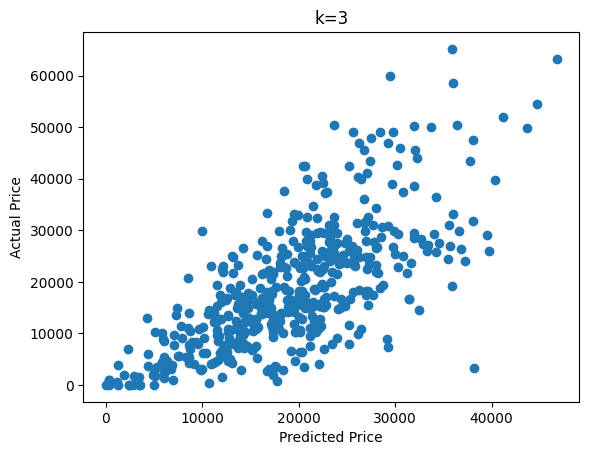

MSE for k=10: 93254670.26256


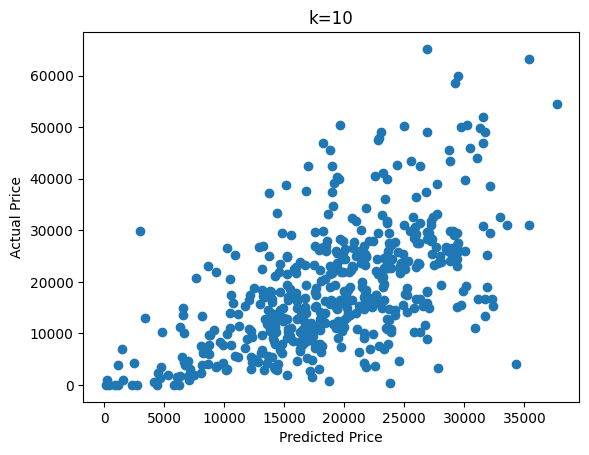

MSE for k=25: 99303405.001664


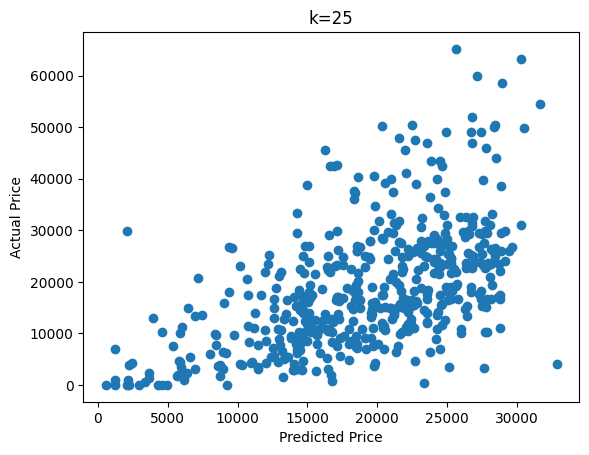

MSE for k=50: 99764045.53206399


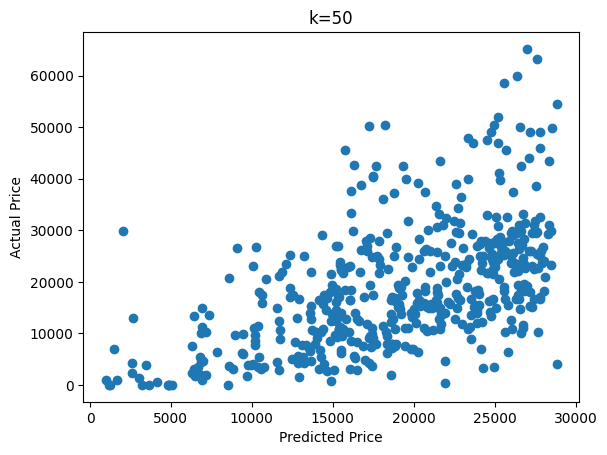

MSE for k=100: 103160223.01959759


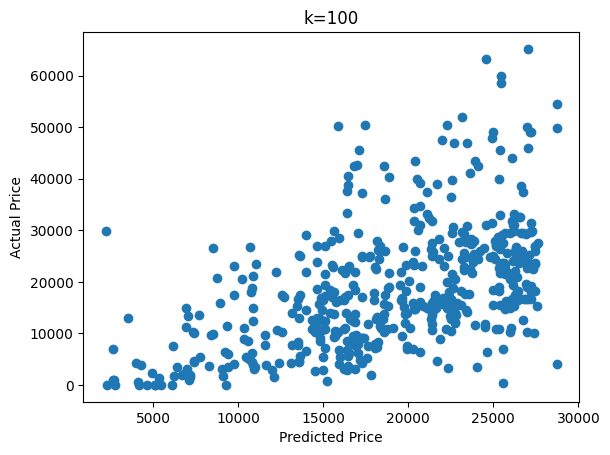

MSE for k=300: 106186519.42720614


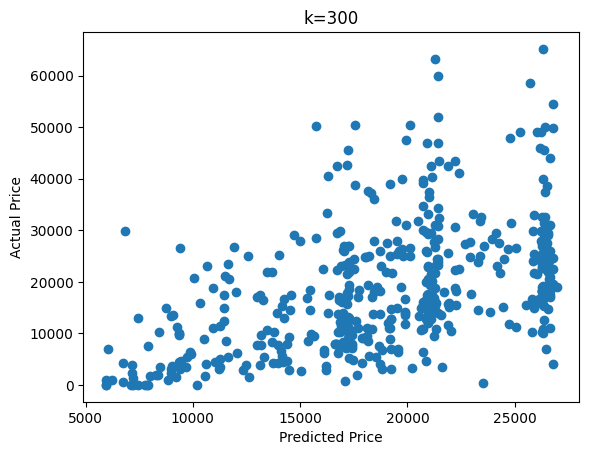



Mean squared error values with increasing k: ['6.91e+07', '9.33e+07', '9.93e+07', '9.98e+07', '1.03e+08', '1.06e+08']


In [42]:
# 4
from sklearn.neighbors import KNeighborsRegressor
MSE = []

# k = 3
k=3
model = KNeighborsRegressor(n_neighbors=k) # Create a sk model for k=3
fitted_model = model.fit(X,y) # Train the model on our data

y_hat = fitted_model.predict(X_test) # Predict y values for test data

MSE.append(np.mean( (y_test-y_hat)**2 )) # Calculate mean squared error and append to list
print("MSE for k=3:", np.mean( (y_test-y_hat)**2 ))

plt.scatter(y_hat,y_test) # Scatterplot of test value against predicted value
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("k=3")
plt.show()

# k = 10
k=10
model = KNeighborsRegressor(n_neighbors=k)
fitted_model = model.fit(X,y) # Train the model on our data

y_hat = fitted_model.predict(X_test) # Predict y values for test data

MSE.append(np.mean( (y_test-y_hat)**2 )) # Calculate mean squared error and append to list
print("MSE for k=10:", np.mean( (y_test-y_hat)**2 ))

plt.scatter(y_hat,y_test) # Scatterplot of test value against predicted value
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("k=10")
plt.show()

# k = 25
k=25
model = KNeighborsRegressor(n_neighbors=k)
fitted_model = model.fit(X,y) # Train the model on our data

y_hat = fitted_model.predict(X_test) # Predict y values for test data

MSE.append(np.mean( (y_test-y_hat)**2 )) # Calculate mean squared error and append to list
print("MSE for k=25:", np.mean( (y_test-y_hat)**2 ))

plt.scatter(y_hat,y_test) # Scatterplot of test value against predicted value
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("k=25")
plt.show()

# k = 50
k=50
model = KNeighborsRegressor(n_neighbors=k)
fitted_model = model.fit(X,y) # Train the model on our data

y_hat = fitted_model.predict(X_test) # Predict y values for test data

MSE.append(np.mean( (y_test-y_hat)**2 )) # Calculate mean squared error and append to list
print("MSE for k=50:", np.mean( (y_test-y_hat)**2 ))

plt.scatter(y_hat,y_test) # Scatterplot of test value against predicted value
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("k=50")
plt.show()

# k = 100
k = 100
model = KNeighborsRegressor(n_neighbors=k)
fitted_model = model.fit(X,y) # Train the model on our data

y_hat = fitted_model.predict(X_test) # Predict y values for test data

MSE.append(np.mean( (y_test-y_hat)**2 )) # Calculate mean squared error and append to list
print("MSE for k=100:", np.mean( (y_test-y_hat)**2 ))

plt.scatter(y_hat,y_test) # Scatterplot of test value against predicted value
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("k=100")
plt.show()

# k = 300
k = 300
model = KNeighborsRegressor(n_neighbors=k)
fitted_model = model.fit(X,y) # Train the model on our data

y_hat = fitted_model.predict(X_test) # Predict y values for test data

MSE.append(np.mean( (y_test-y_hat)**2 )) # Calculate mean squared error and append to list
print("MSE for k=300:", np.mean( (y_test-y_hat)**2 ))

plt.scatter(y_hat,y_test) # Scatterplot of test value against predicted value
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("k=300")
plt.show()

print("\n")
MSE_values = ["{:.2e}".format(float(mse)) for mse in MSE]
print("Mean squared error values with increasing k:", MSE_values)

# What patterns do you notice as you increase  𝑘 ?
As k increases, the mean squared error increases and the predictions become less accurate. I believe this is due to the model being underfitted to the data with a larger k value, as it is considering too many neighboring values when making its prediction. This is also evident by the scatterplots, as the plots for smaller k values are closer to a positive line of slope m = 1 (representing a good fit). For the larger k values, the plot becomes very scattered.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data.

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data.
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE.
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.